<a href="https://colab.research.google.com/github/333CME/Challengue-Data-Science/blob/main/FINAL_AluraStoreLatam_AJUSTADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
# Importar datos. Ojo con el raw, es importante para importar como datos utilizables.
# https://github.com/333CME/Challengue-Data-Science/blob/main/tienda_1.csv Tuve que eliminar el blob y el espacio el archivo tenía un espacio en el nombre
# El espacio en el nombre del archivo generaba y error en la url % y no podía correr el código
'''En general desarrollé el código para ir haciendo mejoras, con la ayuda de IA, como por ejemplo:
Cambié todas las url por una url genérica que permita al código agregar todas las url con datos necesarias
Mediante la función datos con un ciclo for asignado a un rango desde 1 a 5, pero que se podría modificar eventualmente hasta n
Esta fue la parte más compleja de la investigación para el código'''
import pandas as pd
datos = pd.concat([pd.read_csv(f"https://raw.githubusercontent.com/333CME/Challengue-Data-Science/main/tienda_{i}.csv").assign(Tienda=f'Tienda_{i}') for i in range(1,5)])


In [2]:
# Mostrar estructura de datos
datos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [3]:
pip install pandas matplotlib

#1. Análisis de facturación



In [11]:
import seaborn as sns

# Función CORREGIDA para calcular facturación total por tienda (promedio simple)
facturacion = datos.groupby('Tienda').apply(
    lambda x: x['Precio'].mean()  # Cambio clave: usamos mean() en lugar de la multiplicación por cuotas
).reset_index(name='Facturación Promedio')  # Cambiamos el nombre para reflejar que es un promedio

# Guardamos una copia numérica para el gráfico
facturacion_num = facturacion.copy()

# Formatear como dinero para la tabla
facturacion['Facturación Promedio'] = facturacion['Facturación Promedio'].map('${:,.2f}'.format)

# Mostrar tabla
print("Tabla de Facturación Promedio por Tienda:")
display(facturacion.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]
    }]))


Tabla de Facturación Promedio por Tienda:


<ipython-input-11-ab66890b9bc5>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  facturacion = datos.groupby('Tienda').apply(


,Tienda,Facturación Promedio
0,Tienda_1,"$487,867.91"
1,Tienda_2,"$473,227.43"
2,Tienda_3,"$465,459.77"
3,Tienda_4,"$440,362.89"




Gráfico de Facturación Promedio por Tienda:


<ipython-input-16-4ad37f6ea9d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


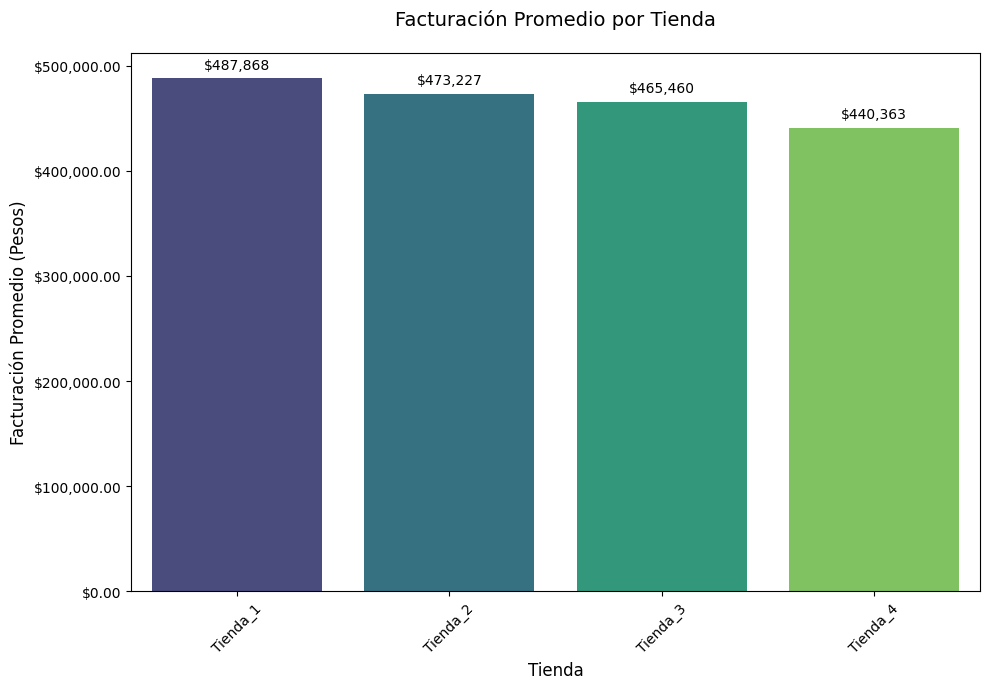

In [16]:
# Gráfico en línea separada
print("\n\nGráfico de Facturación Promedio por Tienda:")  # Título
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='Tienda',
    y='Facturación Promedio',
    data=facturacion_num,
    palette='viridis'
)

# Personalizar gráfico
plt.title('Facturación Promedio por Tienda', fontsize=14, pad=20)  # Configurando el título
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación Promedio (Pesos)', fontsize=12)
ax.yaxis.set_major_formatter('${x:,.2f}')  # Cambiado a 2 decimales para promedios

# Añadir valores encima de las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',  # Mostrar 2 decimales para precisión
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [5]:
# Para calcular las categorías populares
# Aquí es clave usar groupby para agrupar datos
# Los puntos se usan para concatenar las instrucciones
categorias_populares = (datos.groupby(['Tienda', 'Categoría del Producto']).size().groupby('Tienda').nlargest(3).reset_index(level=0, drop=True).unstack())




Top 3 de Categorías más Populares por Tienda:


<Figure size 800x600 with 0 Axes>

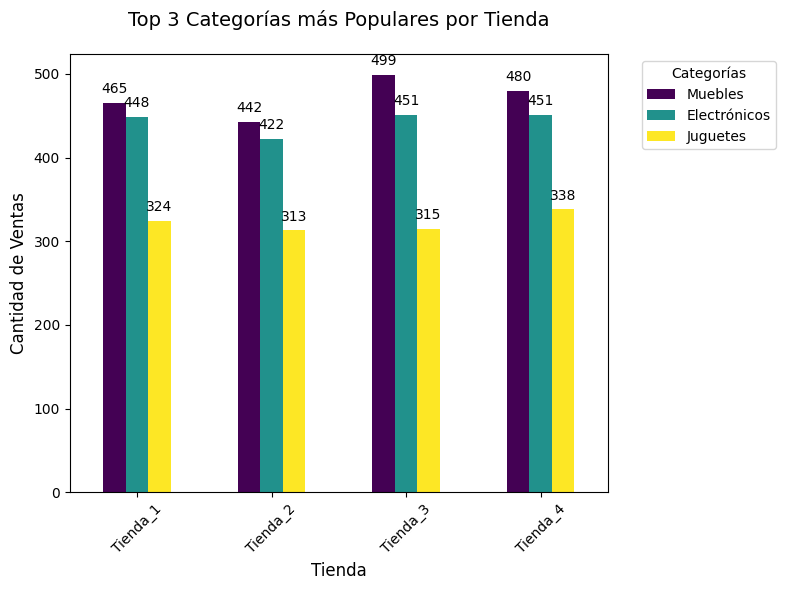

In [25]:
# Preparamos los datos de categorías populares (top 3 por tienda)

# Creamos el gráfico
print("\n\nTop 3 de Categorías más Populares por Tienda:")
plt.figure(figsize=(8,6))

# Graficamos cada categoría como una barra agrupada
categorias_populares.plot(kind='bar', stacked=False, colormap='viridis', figsize=(8,6))

# Personalización del gráfico
plt.title('Top 3 Categorías más Populares por Tienda', fontsize=14, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45)

# Añadir valores encima de las barras
ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0:  # Solo mostrar valores para barras con altura > 0
        ax.annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

# Leyenda
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Tabla de Calificación Promedio por Tienda:


,Tienda,Calificación Promedio
0,Tienda_1,3.98
1,Tienda_2,4.04
2,Tienda_3,4.05
3,Tienda_4,4.00


<ipython-input-31-ecc19c5dc70c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


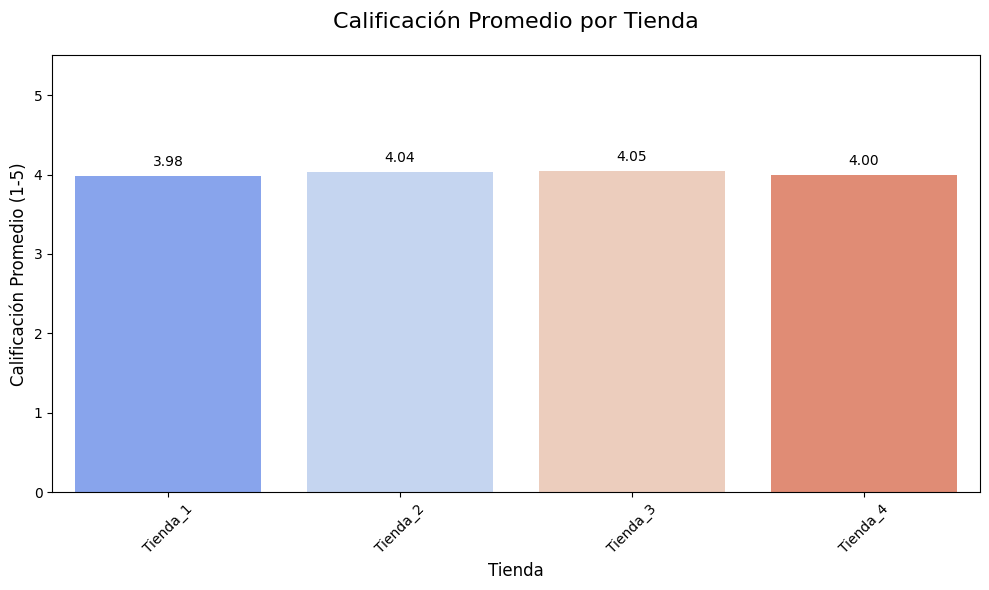

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular el promedio de calificaciones por tienda
calificaciones_promedio = datos.groupby('Tienda')['Calificación'].mean().reset_index()
calificaciones_promedio.columns = ['Tienda', 'Calificación Promedio']

# 2. Mostrar la tabla de resultados
print("Tabla de Calificación Promedio por Tienda:")
display(calificaciones_promedio.style
       .format({'Calificación Promedio': '{:.2f}'})
       .set_properties(**{'text-align': 'center'})
       .set_table_styles([{
           'selector': 'th',
           'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]
       }])
       .background_gradient(cmap='Blues', subset=['Calificación Promedio']))

# 3. Crear el gráfico de calificaciones promedio
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Tienda',
    y='Calificación Promedio',
    data=calificaciones_promedio,
    palette='coolwarm',
    saturation=0.8
)

# Personalizar el gráfico
plt.title('Calificación Promedio por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
plt.ylim(0, 5.5)  # Asumiendo que la calificación va de 1 a 5

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [37]:
import pandas as pd

def analizar_productos_por_tienda(datos):
    # Lista para almacenar resultados
    resultados = []

    for tienda in datos['Tienda'].unique():
        # Filtrar datos por tienda
        df_tienda = datos[datos['Tienda'] == tienda]

        # Calcular frecuencia y monto total por producto
        resumen = df_tienda.groupby('Producto', as_index=False).agg(
            Cantidad_Vendida=('Producto', 'size'),
            Monto_Total=('Precio', 'sum')
        )

        # Obtener 2 más vendidos (eliminando duplicados si existen)
        mas_vendidos = resumen.sort_values('Cantidad_Vendida', ascending=False).drop_duplicates().head(2)
        mas_vendidos['Tipo'] = 'Más Vendidos'

        # Obtener 2 menos vendidos (eliminando duplicados si existen)
        menos_vendidos = resumen.sort_values('Cantidad_Vendida', ascending=True).drop_duplicates().head(2)
        menos_vendidos['Tipo'] = 'Menos Vendidos'

        # Combinar resultados
        resultados_tienda = pd.concat([mas_vendidos, menos_vendidos])
        resultados_tienda['Tienda'] = tienda

        resultados.append(resultados_tienda)

    # Combinar todos los resultados y reiniciar índice
    tabla_final = pd.concat(resultados).reset_index(drop=True)

    # Ordenar resultados
    tabla_final = tabla_final.sort_values(['Tienda', 'Tipo', 'Cantidad_Vendida'],
                                        ascending=[True, False, False])

    # Formatear montos como dinero
    tabla_final['Monto_Total'] = tabla_final['Monto_Total'].apply(lambda x: f"${x:,.2f}")

    return tabla_final[['Tienda', 'Tipo', 'Producto', 'Cantidad_Vendida', 'Monto_Total']]

# Generar resultados
resultados_finales = analizar_productos_por_tienda(datos)

# Mostrar tabla sin formato condicional complejo
print("Análisis de 2 Productos Más y Menos Vendidos por Tienda")
display(resultados_finales.style
       .set_properties(**{'text-align': 'center'})
       .set_table_styles([{
           'selector': 'th',
           'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]
       }]))


Análisis de 2 Productos Más y Menos Vendidos por Tienda


,Tienda,Tipo,Producto,Cantidad_Vendida,Monto_Total
0,Tienda_1,Más Vendidos,Armario,60,"$29,462,300.00"
1,Tienda_1,Más Vendidos,TV LED UHD 4K,60,"$142,150,200.00"
2,Tienda_1,Menos Vendidos,Auriculares con micrófono,33,"$4,730,800.00"
3,Tienda_1,Menos Vendidos,Celular ABXY,33,"$32,651,000.00"
4,Tienda_2,Más Vendidos,Iniciando en programación,65,"$3,127,800.00"
5,Tienda_2,Más Vendidos,Microondas,62,"$36,192,000.00"
7,Tienda_2,Menos Vendidos,Impresora,34,"$10,385,300.00"
6,Tienda_2,Menos Vendidos,Juego de mesa,32,"$5,811,900.00"
8,Tienda_3,Más Vendidos,Kit de bancas,57,"$16,699,800.00"
9,Tienda_3,Más Vendidos,Mesa de comedor,56,"$14,326,100.00"


# 5. Envío promedio por tienda

Tabla de Costo Promedio de Envío por Tienda:


,Tienda,Costo Promedio de Envío
0,Tienda_1,"$26,018.61"
1,Tienda_2,"$25,216.24"
2,Tienda_3,"$24,805.68"
3,Tienda_4,"$23,459.46"


<ipython-input-41-abefe6e8071b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


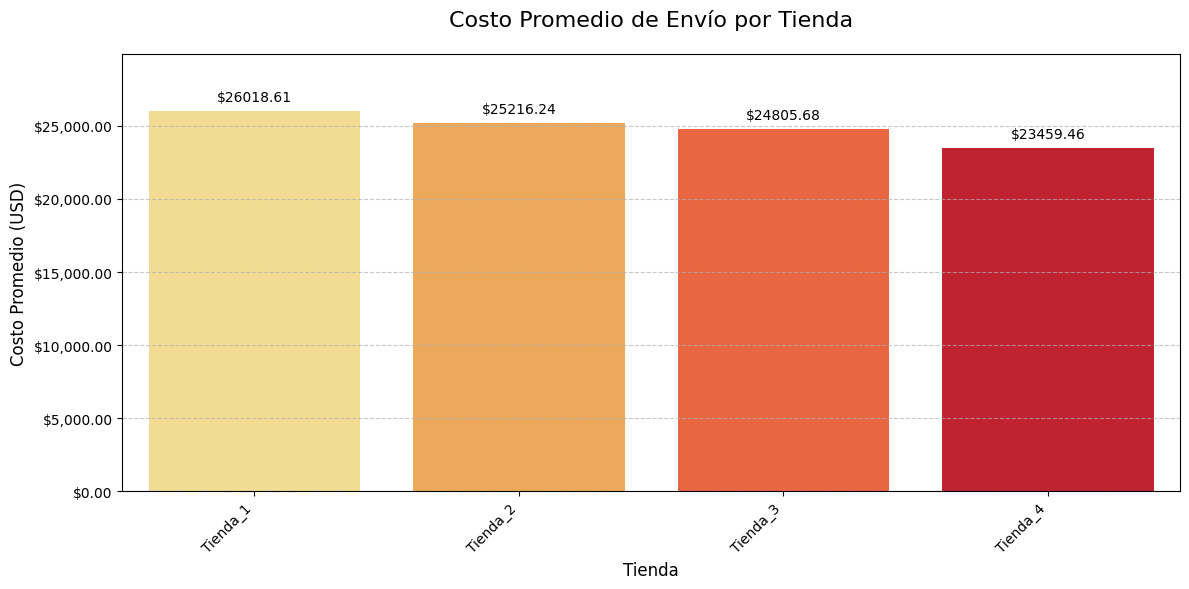

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar el nombre correcto de la columna (según lo mostrado en tus datos)
columna_costo = 'Costo de envío'  # Nombre exacto de la columna

# 2. Calcular el costo promedio de envío por tienda
costo_envio_promedio = datos.groupby('Tienda')[columna_costo].mean().reset_index()
costo_envio_promedio.columns = ['Tienda', 'Costo Promedio de Envío']

# 3. Mostrar los datos en una tabla
print("Tabla de Costo Promedio de Envío por Tienda:")
display(costo_envio_promedio.style
       .format({'Costo Promedio de Envío': '${:,.2f}'})
       .set_properties(**{'text-align': 'center'})
       .set_table_styles([{
           'selector': 'th',
           'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]
       }])
       .background_gradient(cmap='YlOrRd', subset=['Costo Promedio de Envío']))

# 4. Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Tienda',
    y='Costo Promedio de Envío',
    data=costo_envio_promedio,
    palette='YlOrRd',
    saturation=0.8
)

# Personalizar el gráfico
plt.title('Costo Promedio de Envío por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo Promedio (USD)', fontsize=12)

# Ajustar escala del eje Y para mejor visualización
max_costo = costo_envio_promedio['Costo Promedio de Envío'].max()
plt.ylim(0, max_costo * 1.15)  # Margen del 15% arriba del máximo
ax.yaxis.set_major_formatter('${x:,.2f}')  # Formato de dinero

# Añadir valores encima de las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir líneas de referencia horizontales
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

